In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# Show first few rows
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Reload data (if needed)
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# Make a copy and encode categorical columns
data_encoded = data.copy()

# Label encode categorical columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in ['sex', 'smoker', 'region']:
    data_encoded[column] = encoder.fit_transform(data_encoded[column])

# Check if 'expenses' column exists now
print(data_encoded.columns)
data_encoded.head()


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
print(data_encoded.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [ ]:
# Check if column is named 'charges' instead of 'expenses'
if 'expenses' in data_encoded.columns:
    label_column = 'expenses'
elif 'charges' in data_encoded.columns:
    label_column = 'charges'
else:
    raise ValueError("Neither 'expenses' nor 'charges' column found in dataset.")

# Now split features and labels
features = data_encoded.drop(label_column, axis=1)
labels = data_encoded[label_column]

# Train-test split
from sklearn.model_selection import train_test_split
train_dataset, test_dataset, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)



In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
train_dataset_scaled = scaler.fit_transform(train_dataset)
test_dataset_scaled = scaler.transform(test_dataset)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=[train_dataset.shape[1]]),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(), loss='mae', metrics=['mae'])

# Train the model
history = model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2, verbose=0)

print("✅ Model training complete!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Model training complete!


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build a deeper model
model = Sequential([
    Dense(128, activation='relu', input_shape=[train_dataset.shape[1]]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])

# Train the model on the scaled data
history = model.fit(train_dataset_scaled, train_labels, epochs=200, validation_split=0.2, verbose=0)

print("✅ Improved model training complete!")


✅ Improved model training complete!


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1361.0796 - mae: 1361.0796
📊 Improved Mean Absolute Error: $1504.34
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


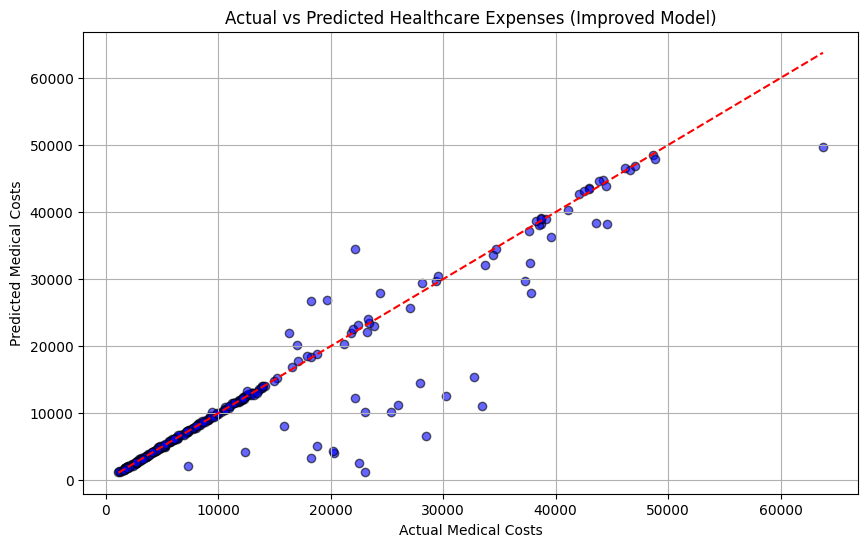

In [ ]:
# Evaluate on scaled test set
loss, mae = model.evaluate(test_dataset_scaled, test_labels)
print(f"📊 Improved Mean Absolute Error: ${mae:.2f}")

# Predict and plot
predicted = model.predict(test_dataset_scaled).flatten()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(test_labels, predicted, alpha=0.6, color='blue', edgecolors='black')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='red', linestyle='--')
plt.xlabel('Actual Medical Costs')
plt.ylabel('Predicted Medical Costs')
plt.title('Actual vs Predicted Healthcare Expenses (Improved Model)')
plt.grid(True)
plt.show()
